theta =  [0.57142857 0.85714286]
y predict =  [0.57142857 9.14285714]


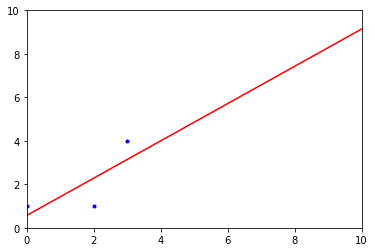

In [ ]:
import numpy as np
x = np.array([0,2,3])
y = np.array([1,1,4])
x_b = np.c_[np.ones((3,1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[0],[10]])
x_n_b = np.c_[np.ones((2,1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n, y_p,"r-")
plt.plot(x,y, "b.")
plt.axis([0,10,0,10])
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression 
x = np.array([[0,2,3]]).T
y = np.array([1,1,4])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)
x_n = np.array([[0]]).T
ans = lin_reg.predict(x_n)
print(ans)

0.5714285714285712  ,  [0.85714286]
[0.57142857]


x.shape = (3, 1) y.shape = (3,)
Converged, iterations:  30 / 1000
theta0 = [0.58117577] theta1 = [0.84881281]
intercept = 0.5714285714285714 slope = 0.8571428571428571


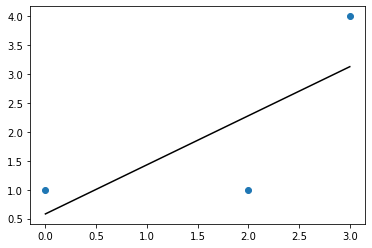

In [ ]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta0, theta1, x, y, m):
    c = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
    return c

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
  
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = cost_function(t0,t1,x,y,m) 

    # Iterate Loop
    while not converged:
        grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        # update theta
        t0 = temp0
        t1 = temp1

        # error
        e = cost_function(t0,t1,x,y,m)

        if abs(J-e) <= ep:
           print("Converged, iterations: ", iter, "/", max_iter)
           converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
    x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
    y = np.array([1,1,4])
    print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
    alpha = 0.01 # learning rate

    theta0, theta1 = gradient_descent(alpha, x, y, max_iter=1000)
    print (("theta0 = %s theta1 = %s") %(theta0, theta1)) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print (("intercept = %s slope = %s") %(intercept, slope))

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()